In [1]:
import cv2
import glob
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
def le(nomearq):
    with open(nomearq,"r") as f:
        linhas=f.readlines()
    linha0=linhas[0].split()
    nl=int(linha0[0]); nc=int(linha0[1])
    a=np.empty((nl,nc),dtype=np.float32)
    for l in range(nl):
        linha=linhas[l+1].split()
        for c in range(nc):
            a[l,c]=np.float32(linha[c])
    return a
ax = le("ax.txt"); ay = le("ay.txt")
qx = le("qx.txt"); qy = le("qy.txt")

In [3]:
# Validação cruzada
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(ax, ay, test_size = 0.1, random_state=1)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

Qtde de treino: 617
Qtde de validação: 69


In [4]:
# Criando a MLP
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(len(ax[0]),)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [5]:
batch_size = 100
epochs = 200
history = model.fit(ax, ay,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))

Epoch 1/200
7/7 [==============================] - 1s 40ms/step - loss: 1.0450 - accuracy: 0.3834 - val_loss: 0.9683 - val_accuracy: 0.5072
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.9736 - accuracy: 0.5437 - val_loss: 0.9089 - val_accuracy: 0.5942
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.9092 - accuracy: 0.5845 - val_loss: 0.8565 - val_accuracy: 0.5942
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.8564 - accuracy: 0.5918 - val_loss: 0.8126 - val_accuracy: 0.6087
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.8093 - accuracy: 0.5933 - val_loss: 0.7755 - val_accuracy: 0.6232
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7715 - accuracy: 0.5991 - val_loss: 0.7445 - val_accuracy: 0.6087
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.7406 - accuracy: 0.6006 - val_loss: 0.7184 - val_accuracy: 0.6232
Epoch 8/200
7/7 [========

In [6]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

22/22 [==============================] - 0s 1ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       377
           1       1.00      0.99      0.99       309

    accuracy                           0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686



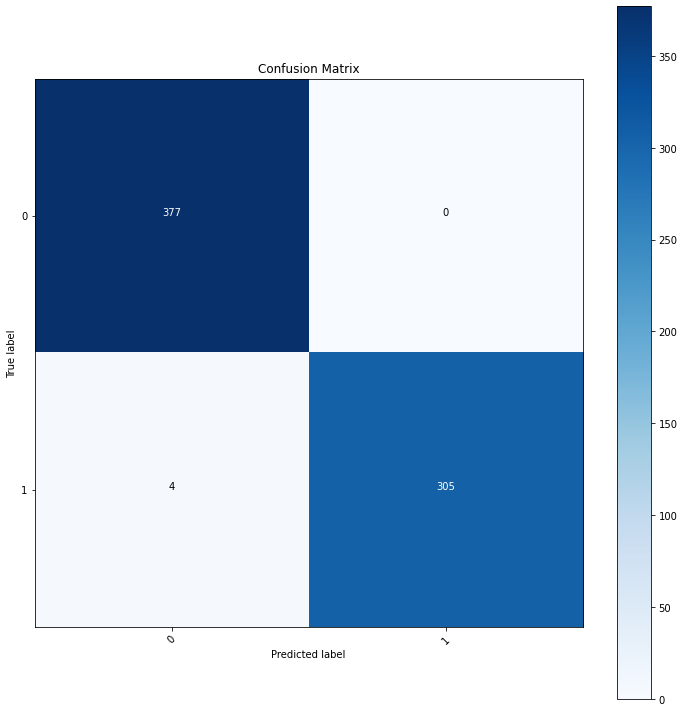

In [7]:
target_names = ['0', '1']
qp = (model.predict(qx) > 0.5)
cm = confusion_matrix(qp,qy)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(qp, qy, target_names=target_names))
